In [40]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [16]:
!pip install opendatasets


In [17]:
import opendatasets as od


In [18]:
dataset = 'https://www.kaggle.com/datasets/robikscube/rollercoaster-database'


In [20]:
od.download(dataset)



Skipping, found downloaded files in ".\rollercoaster-database" (use force=True to force download)


In [21]:
import os




In [22]:
data_dir = ".\rollercoaster-database"


In [23]:
os.listdir(data_dir)


OSError: [WinError 123] The filename, directory name, or volume label syntax is incorrect: '.\rollercoaster-database'

In [24]:
import pandas as pd


In [27]:
df = pd.read_csv('coaster_db.csv')

In [50]:
#df

## __Step 1: Data Understanding__
### __- DataFrame shape__
### __- head and tail__
### __- dtypes__
### __- describe__



In [29]:
df.shape

(1087, 56)

In [49]:
#df.columns

In [44]:
#df.dtypes

In [ ]:
#df.head()

In [48]:
#df.describe()

In [ ]:
#df.tail()

## __Step 2: Data Preperation:__
### __- Dropping irrelevant columns and rows__
### __- Identifying duplicated columns__
### __- Renaming Columns__
### __- Feature Creation__

In [ ]:
# drop a column from the data set
# df.drop(['Opening date'], axis=1)

In [62]:
# df.columns listed an index of all columns in data set. Copy and paste them to df using double brackets. 
# Now delete the unwanted columns to create the new data frame.
# Make a new 'df' containing only the columns we've chosen
# Add .copy() to end of data frame so python knows its new and not a reference to the old. 

df = df[['coaster_name',
    #'Length', 'Speed', 
    'Location', 'Status', 
    #'Opening date',
    #  'Type', 
    'Manufacturer', 
    #'Height restriction', 'Model', 'Height',
      # 'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       #'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    #   'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    #   'Track layout', 'Fastrack available', 'Soft opening date.1',
    #   'Closing date', 
    #'Opened', 
    #'Replaced by', 'Website',
    #   'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
    #   'Single rider line available', 'Restraint Style',
     #  'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 
    'Type_Main',
       'opening_date_clean', 
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    #'height_value', 'height_unit', 
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [65]:
# opening_date_clean is an object instead of a date, so change to a time
# to change a column to numeric type: 
#pd.to_numeric(df['column here'])
pd.to_datetime(df['opening_date_clean'])

0      1884-06-16
1      1895-01-01
2             NaT
3      1901-01-01
4      1901-01-01
          ...    
1082          NaT
1083   2022-01-01
1084   2016-06-16
1085          NaT
1086   2022-01-01
Name: opening_date_clean, Length: 1087, dtype: datetime64[ns]

In [116]:
# Rename the columns
# first df.columns to get list of columns
# then rename using dictionary
# This one I'm changing to upper case
#df.columns
df = df.rename(columns={'coaster_name' : 'Coaster_Name',
                  'year_introduced' : 'Year_Introduced',
                  'latitude' : 'Latitude',
                  'longitude' : 'Longitude',
                  'opening_date_clean' : 'Opening_Date',
                  'speed_mph' : 'Speed_MPH',
                  'height_ft' : 'Height_FT',
                  'Gforce_clean' : 'Gforce',
                   'Inversions_clean' : 'Inversions'})

In [70]:
# Looking for Null Values
# df.isna().sum() gives the columns and the sum of null values in each column
df.isna().sum()

Coaster_Name          0
Location              0
Status              213
Manufacturer         59
Year_Introduced       0
Latitude            275
Longitude           275
Type_Main             0
Opening_Date        250
Speed_MPH           150
Height_FT           916
Inversions_clean      0
Gforce              725
dtype: int64

In [73]:
# Find duplicated values in columns.
# First run df.duplicated() to find dup values
# Then df.loc[df.duplicated()] to find exact locations of dups

df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_MPH,Height_FT,Inversions_clean,Gforce


In [75]:
# Run duplicated() on a subset

df.loc[df.duplicated(subset=['Coaster_Name'])]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_MPH,Height_FT,Inversions_clean,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaN,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaN,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaN,53.0,NaN,3,4.7


In [76]:
# Checking example duplicate
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_MPH,Height_FT,Inversions_clean,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [79]:
# Make new data frame keeping only columns that are not dups. NOTICE THE ~
# Reset the index after dropping the dup rows then copy() so python knows this is new df


df = df.loc[~df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date'])] \
    .reset_index(drop=True).copy()

In [80]:
df.shape

(990, 13)

## __Step 3: Feature Understanding__

### __(Univariate Analysis)__

###    - Plotting Feature Distribution
###          - Histogram
###          - KDE
###          - Boxplot

In [81]:
df['Year_Introduced'].value_counts()

1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: Year_Introduced, Length: 101, dtype: int64

Text(0, 0.5, 'Count')

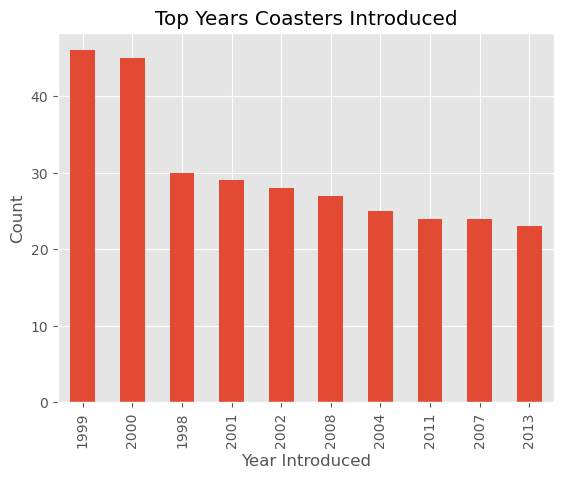

In [96]:
# \ allows to break code up in to seperate lines
# .plot(kind.bar) gives vertical bars; .plot(kind-barh) gives horizontal bars; title = '' gives graph a title
# ax = new data frame
# ax.set_xlabel to label x axis
# ax.set_ylabel to label y axis
ax = df['Year_Introduced'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Years Coasters Introduced')
ax.set_xlabel ('Year Introduced')
ax.set_ylabel('Count')

Text(0.5, 24.999999999999986, 'Speed (MPH)')

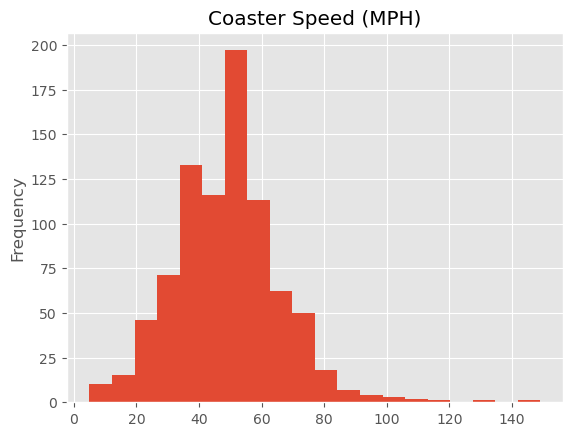

In [99]:
# Histogram plot

df['Speed_MPH'].plot(kind='hist', 
                     bins=20, 
                     title='Coaster Speed (MPH)')
ax.set_xlabel('Speed (MPH)')

Text(0.5, 24.999999999999986, 'Speed (MPH)')

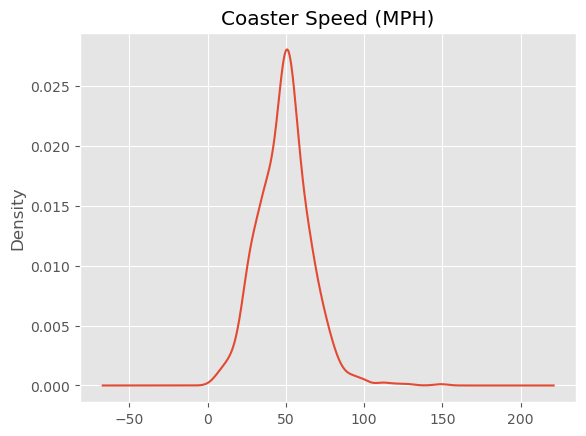

In [104]:
# KDE (Kernel Density Estimate) plot

df['Speed_MPH'].plot(kind='kde', 
                     title='Coaster Speed (MPH)')
ax.set_xlabel('Speed (MPH)')

## __Step 4: Feature Relationships__

###    __- Scatterplot__
###    __- Heatmap Correlation__
###    __- Pairplot__
###    __- Groupby Comparisons__


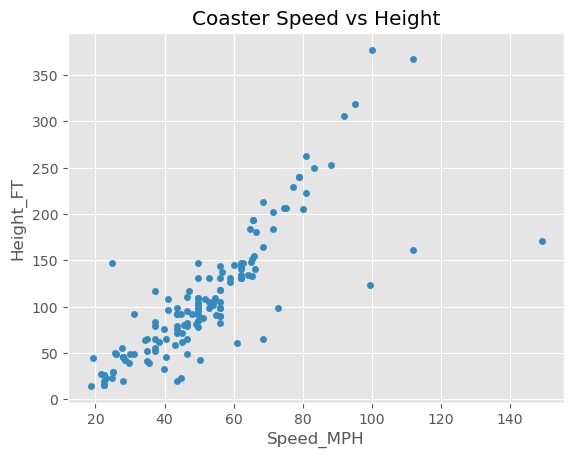

In [109]:
# Pandas plots are basic plots. For more advanced plotting, use Seaborn

df.plot(kind='scatter', 
        x='Speed_MPH', 
        y='Height_FT',
       title='Coaster Speed vs Height')
# plt.show() ommits the subplot
plt.show()

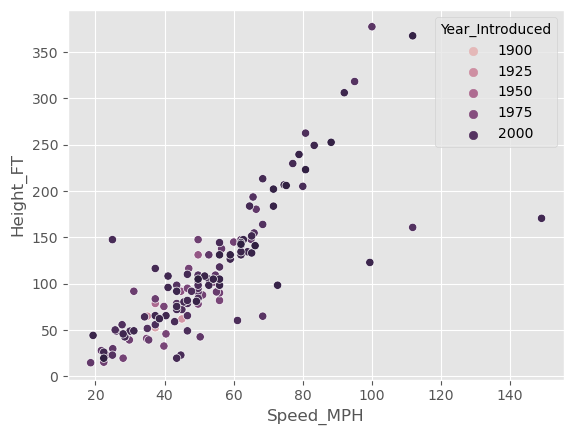

In [114]:
sns.scatterplot(x='Speed_MPH', 
        y='Height_FT',
                hue='Year_Introduced',
               data=df)
plt.show()

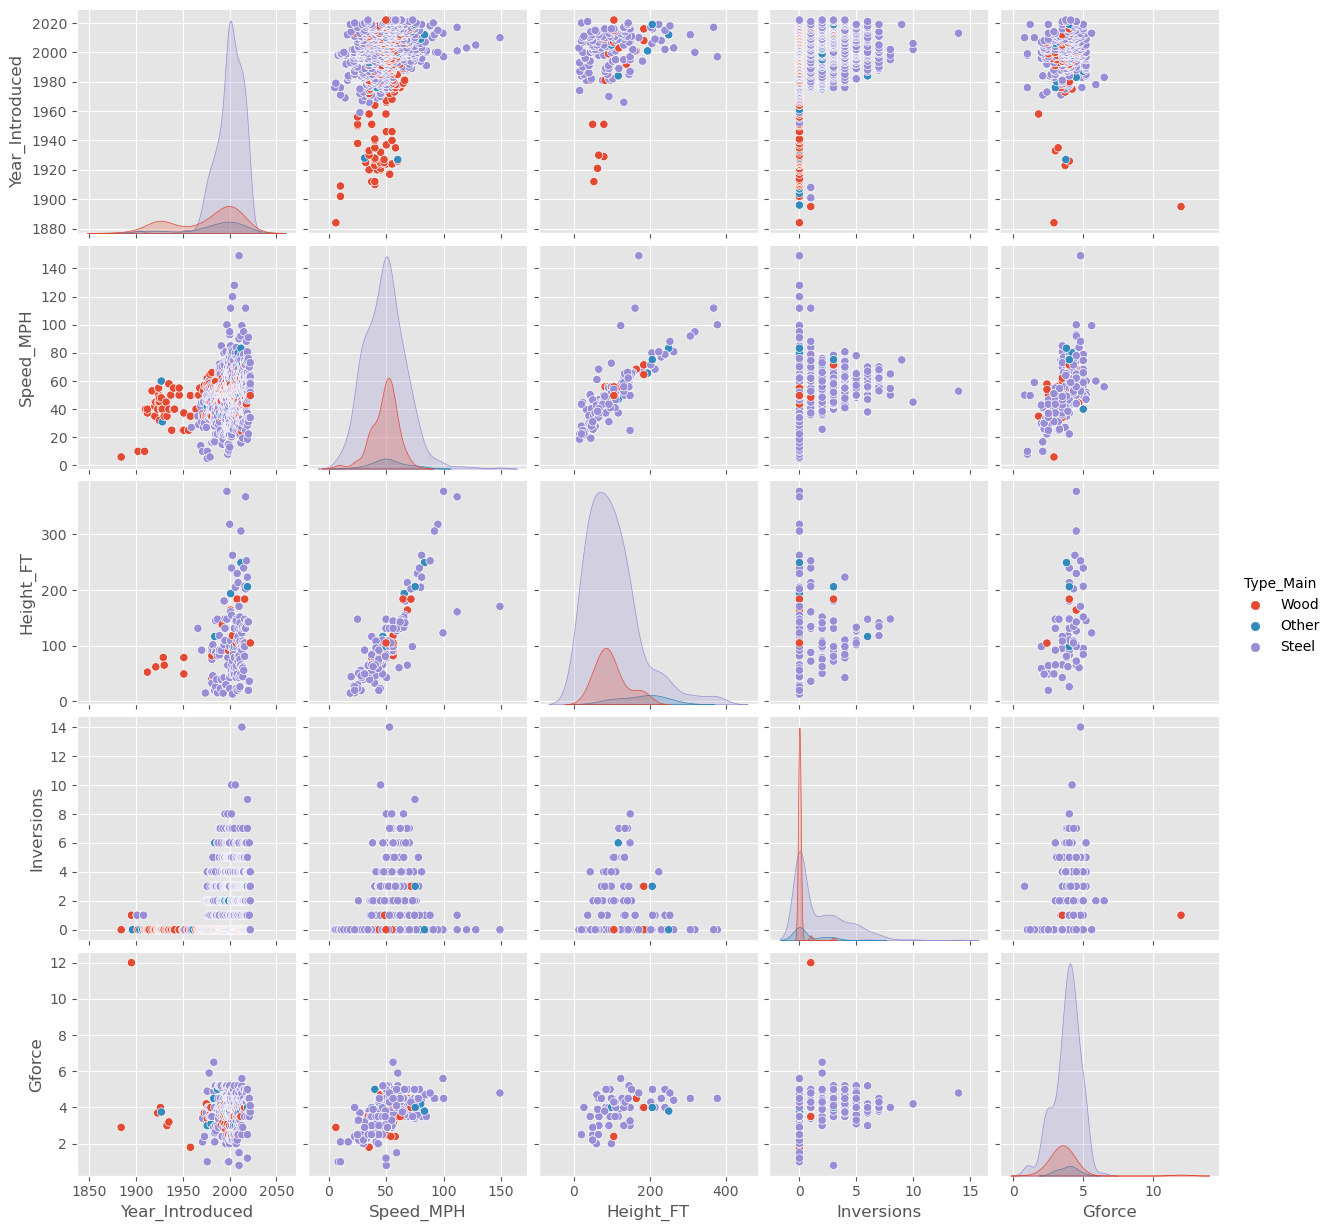

In [119]:
# Use pairplot to compare multiple elements

sns.pairplot(df,vars=['Year_Introduced', 'Speed_MPH',
                     'Height_FT', 'Inversions', 'Gforce'],
            hue='Type_Main')
plt.show()
    
    
    

In [125]:
# Use code from above, but drop null values, and correlate the data

df_corr = df[['Year_Introduced', 'Speed_MPH',
                     'Height_FT', 'Inversions', 'Gforce']].dropna().corr()


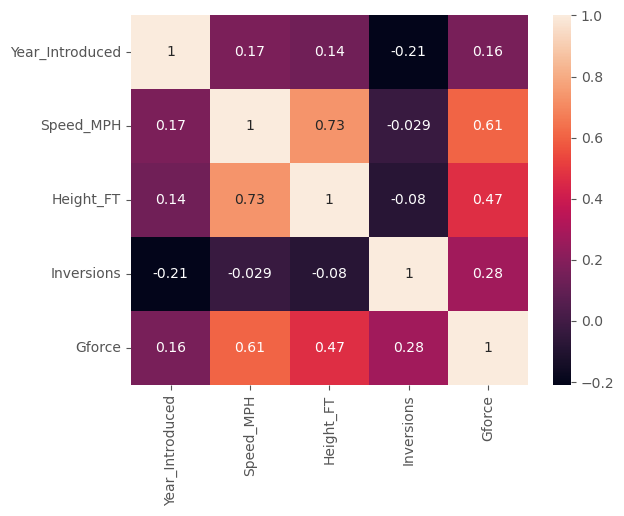

In [129]:
# Add annot=True for annotations in heat map
sns.heatmap(df_corr, annot=True )
plt.show()

## __Step 5: Ask a Question about the data__
###    __- Try to answer a question you have about the data using a plot or statistic__

In [130]:
df.scatterplot

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_MPH,Height_FT,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaN,34.0,NaN,0,NaN


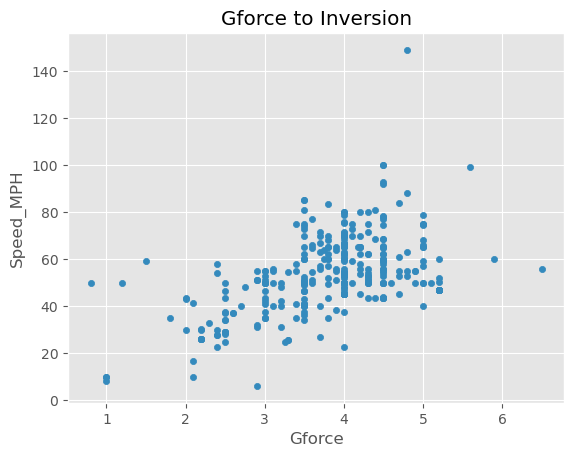

In [132]:
df.plot(kind='scatter', 
        x='Gforce', 
        y='Speed_MPH',
       title='Gforce to Inversion')
# plt.show() ommits the subplot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

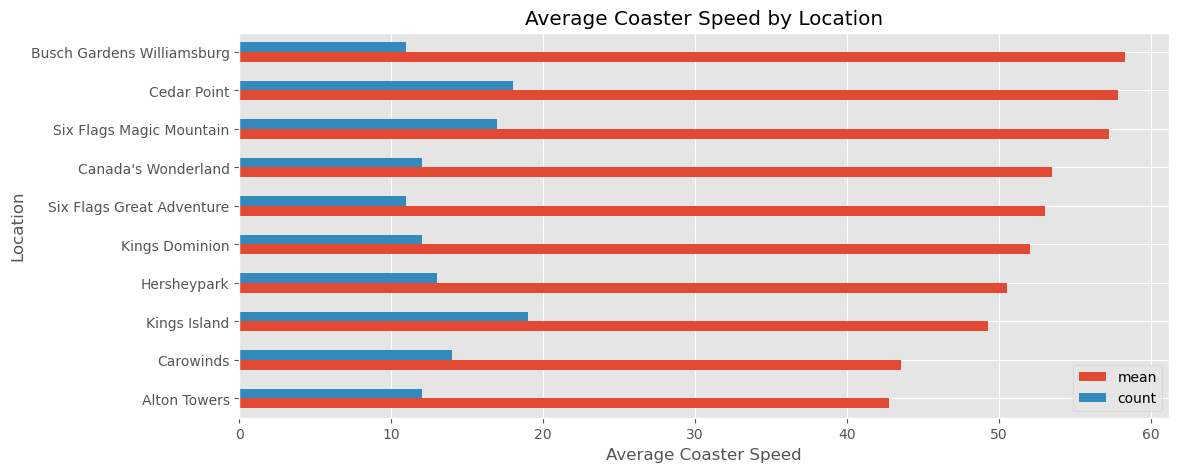

In [144]:
# He chose 'Average Coaster Speed by Location'
ax = df.query('Location != "Other"') \
    .groupby('Location')['Speed_MPH'] \
    .agg(['mean', 'count']) \
    .query('count >= 10') \
    .sort_values('mean') \
    .plot(kind='barh', figsize=(12,5), title='Average Coaster Speed by Location')
ax.set_xlabel('Average Coaster Speed')

plt.show